# A Visual Walkthrough of Gradient Descent

### Calculate Error values for single trial

First we will import helpful libraries and generate some demonstratory data

In [120]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

x = [i*random.random() for i in range(-10, 10)]
y = [i*random.random() for i in range(-10, 10)]
data = dict(zip(x, y))

### Next we define two points to form a line. We plot this line and also use the points to calculate the error of every single point. 

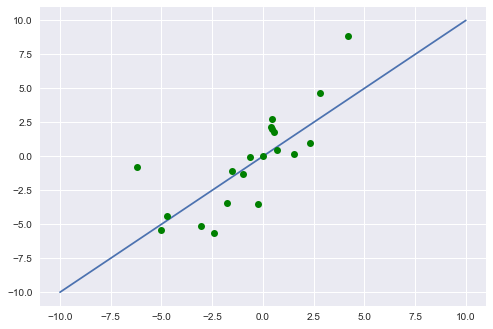

In [121]:
#define trial line endpoint coordinates
trial_line_start = {'x':10, 'y':10}
trial_line_end = {'x':-10, 'y':-10}


trial_line_plot = plt.plot([10, -10], [10, -10])
data_plot = plt.plot(x, y, marker='o', color='green', linestyle='none')

plt.show()

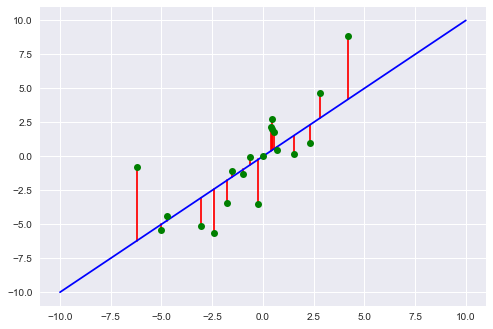

In [122]:
#add errors to plot
#slope of a line = y2-y1/x2-x1
trial_line_slope = (trial_line_end['y'] - trial_line_start['y'])/(trial_line_end['x'] - trial_line_start['x'])
#intercept of a line, plug in m and endpoint coordinates and solve for b
trial_line_yintercept = trial_line_end['y'] - trial_line_slope*trial_line_end['x']

#build list of error lines
error_lines = []
error_values = []
for i in range(len(x)):
    error_line_start = {'x':x[i], 'y':y[i]}
    error_line_end = {'x':x[i], 'y':trial_line_slope*x[i]+trial_line_yintercept}
    
    error_lines.append({'start_point':error_line_start, 'end_point':error_line_end})
    error_values.append((error_line_end['y'] - error_line_start['y']))
    
    #print('Error', i, ': ', error_values[-1])
    
for line in error_lines:
    line_xs = [line['start_point']['x'], line['end_point']['x']]
    line_ys = [line['start_point']['y'], line['end_point']['y']]
    
    plt.plot(line_xs, line_ys, color='red')

trial_line_plot = plt.plot([10, -10], [10, -10], color='blue')
data_plot = plt.plot(x, y, marker='o', color='green', linestyle='none')
plt.show()

### We will use the errors for all points to calculate the "cost" of this hypothesized best-fit. 
Cost is a single value which can be used to score this against other hypothesized trial lines in order to find the true best-fit for our data.

In [123]:
#Mean Square Error cost function
cost = (1/(2*len(error_values)))*sum([value**2 for value in error_values])
print(cost)

2.487511380701962


### Put this process into a function so that we can call it repeatedly

In [168]:
def plot_errors(x, y, trial, plot=True): 
    
    trial_line_start = {'x':trial['start']['x'], 'y':trial['start']['y']}
    trial_line_end = {'x':trial['end']['x'], 'y':trial['end']['y']}
    
    #slope of a line = y2-y1/x2-x1
    trial_line_slope = (trial_line_end['y'] - trial_line_start['y'])/(trial_line_end['x'] - trial_line_start['x'])
    #intercept of a line, plug in m and endpoint coordinates and solve for b
    trial_line_yintercept = trial_line_end['y'] - trial_line_slope*trial_line_end['x']

    #build list of error lines
    error_lines = []
    error_values = []
    for i in range(len(x)):
        error_line_start = {'x':x[i], 'y':y[i]}
        error_line_end = {'x':x[i], 'y':trial_line_slope*x[i]+trial_line_yintercept}

        error_lines.append({'start_point':error_line_start, 'end_point':error_line_end})
        error_values.append((error_line_end['y'] - error_line_start['y']))

        #print('Error', i, ': ', error_values[-1])

    for line in error_lines:
        line_xs = [line['start_point']['x'], line['end_point']['x']]
        line_ys = [line['start_point']['y'], line['end_point']['y']]
        if plot:
            plt.plot(line_xs, line_ys, color='red')
    if plot:
        trial_line_plot = plt.plot([trial['start']['x'], trial['end']['x']], [trial['start']['y'], trial['end']['y']], color='blue')
        data_plot = plt.plot(x, y, marker='o', color='green', linestyle='none')
        plt.show()
    
    cost = (1/(2*len(error_values)))*sum([value**2 for value in error_values])
    return cost, trial_line_slope, trial_line_yintercept

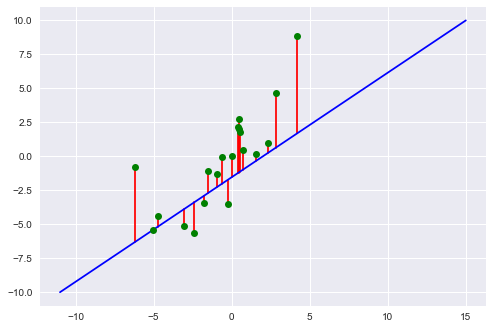

(4.167221932983658, 0.7692307692307693, -1.5384615384615383)

In [169]:
x1 = 15
y1 = 10
x2 = -11
y2 = -10

trial = {'start':{'x':x1, 'y':y1}, 'end':{'x':x2, 'y':y2}}

plot_errors(x, y, trial)

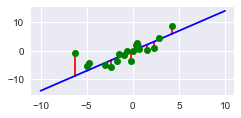

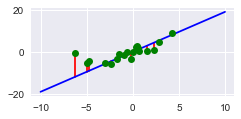

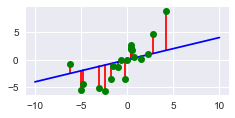

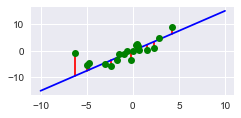

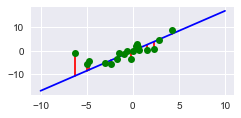

In [170]:
#visualize error values for a variety of trials
costs =  []
for i in range(5):
    x1 = 10
    y1 = random.randrange(0, 20)
    x2 = -10
    y2 = -y1

    trial = {'start':{'x':x1, 'y':y1}, 'end':{'x':x2, 'y':y2}}
    plt.subplot(3, 2, i+1)
    costs.append(plot_errors(x, y, trial))

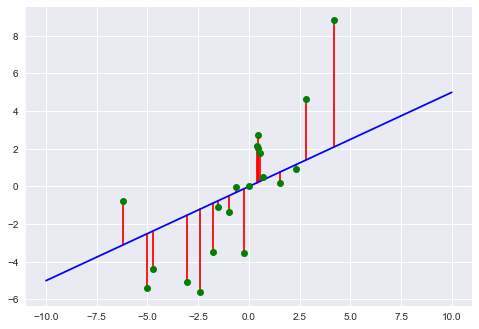

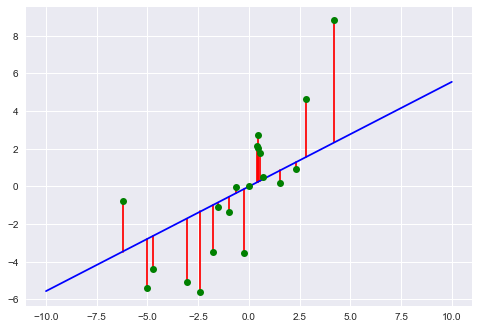

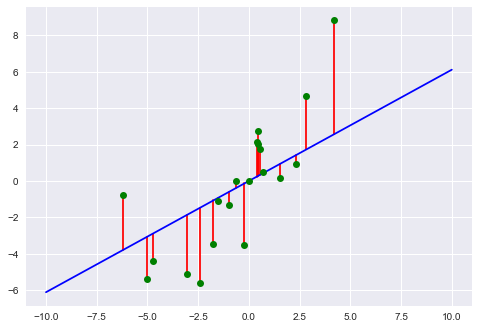

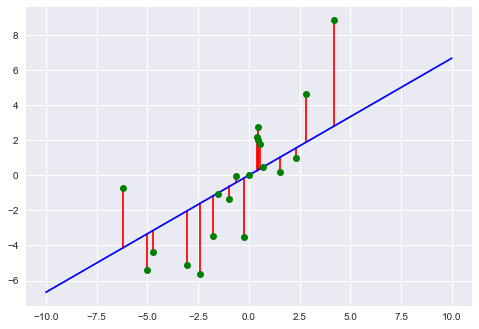

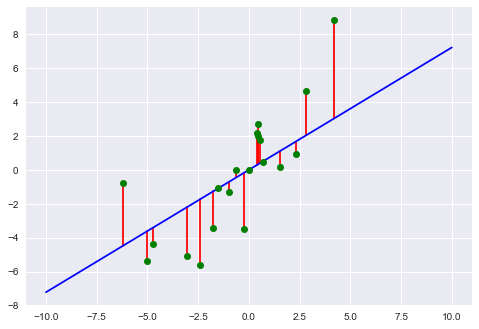

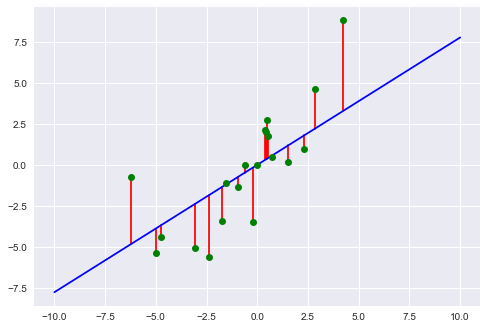

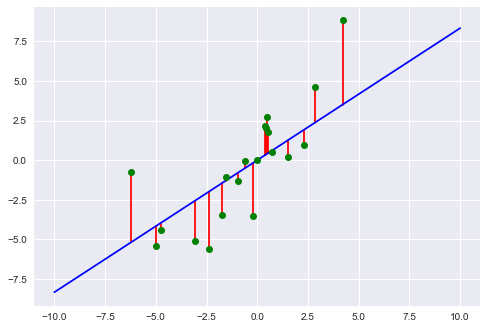

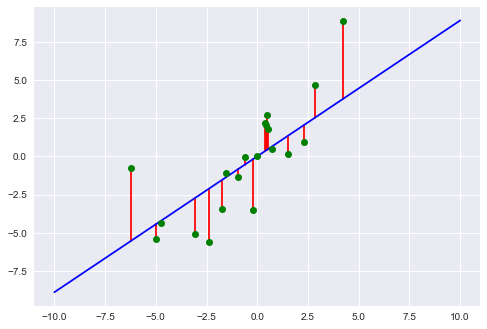

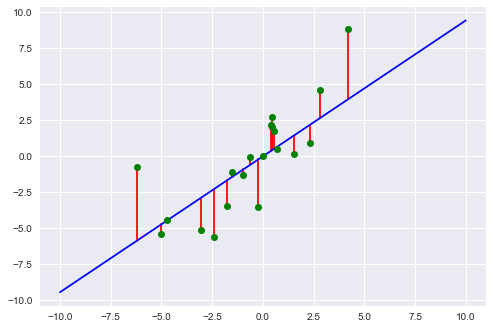

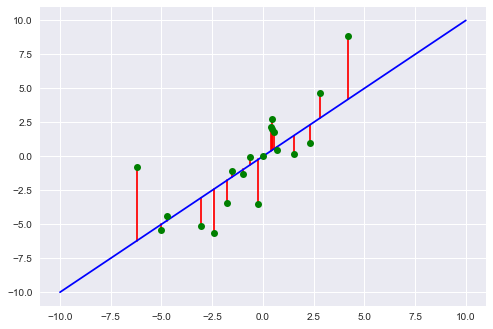

In [171]:
costs =  []
for i in np.linspace(5, 10, 10):
    x1 = 10
    y1 = i
    x2 = -10
    y2 = -i

    trial = {'start':{'x':x1, 'y':y1}, 'end':{'x':x2, 'y':y2}}
    costs.append(plot_errors(x, y, trial))

In [172]:
costs

[(3.516714193323013, 0.5, 0.0),
 (3.3140686623023798, 0.55555555555555558, 0.0),
 (3.1334955470196535, 0.61111111111111105, 0.0),
 (2.9749948474748322, 0.66666666666666674, 8.8817841970012523e-16),
 (2.8385665636679214, 0.72222222222222221, 0.0),
 (2.7242106955989152, 0.77777777777777779, 0.0),
 (2.6319272432678167, 0.83333333333333337, 0.0),
 (2.5617162066746246, 0.88888888888888895, 0.0),
 (2.5135775858193394, 0.94444444444444442, 0.0),
 (2.487511380701962, 1.0, 0.0)]

In [239]:
costs =  []
yvals = np.linspace(0, 15, 20)
for i in yvals:
    for shift in np.linspace(-2, 2, 10):
        x1 = 10 + shift
        y1 = i + shift
        x2 = -10 
        y2 = -i 

        trial = {'start':{'x':x1, 'y':y1}, 'end':{'x':x2, 'y':y2}}
        costs.append(plot_errors(x, y, trial, plot=False))
#print(costs)

### We can plot these costs (with their associated trial-line slope) to get a parabola 

minimum cost: 2.46646301585


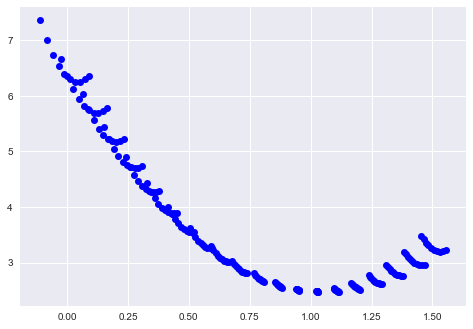

In [240]:

plt.plot([slope for (cost, slope, intercept) in costs], [cost for (cost, slope, intercept) in costs], 'bo')
just_cost = [cost for (cost, slope, intercept) in costs]

#print cost, slope, and intercept values for minimum cost
minimum_cost = costs[just_cost.index(min(just_cost))]
print('minimum cost:', minimum_cost[0])

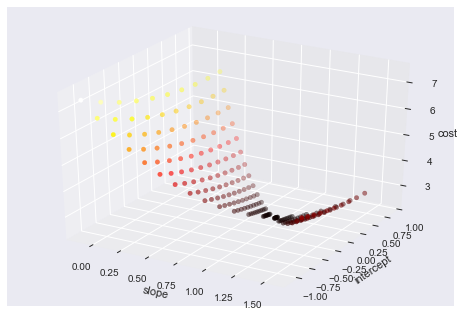

In [241]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
cmhot = plt.get_cmap('hot')
ax.scatter( [m for (c,m,b) in costs], [b for (c,m,b) in costs], [c for (c,m,b) in costs], c=[c for (c,m,b) in costs], cmap=cmhot,  marker='o', s=20)
ax.set_xlabel('slope')
ax.set_ylabel('intercept')
ax.set_zlabel('cost')
plt.show()